<a href="https://colab.research.google.com/github/supperglossar/Mathematocal_Foundations/blob/main/content/algebra/les02_labo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo: Vectoren

**Mathematical Foundations - IT & Artificial Intelligence**

---

In dit labo oefen je met vectoren, matrices en hun operaties. Je leert hoe je deze concepten toepast op echte data, met name de MNIST dataset. De oefeningen bouwen voort op elkaar, dus werk ze in volgorde af.

In [2]:
# Voer deze cel eerst uit om alle benodigde libraries te importeren

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

# Laad de MNIST dataset
print("MNIST laden...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
print(f"Geladen: {len(X)} afbeeldingen")

# Handige functies
def cosine_similarity(u, v):
    """Bereken de cosine similarity tussen twee vectoren."""
    return (u @ v) / (np.linalg.norm(u) * np.linalg.norm(v))

MNIST laden...
Geladen: 70000 afbeeldingen


---

## Oefening 1: Vectoren Aanmaken en Manipuleren


In deze oefening leer je verschillende manieren om vectoren aan te maken in NumPy en hoe je ze kan manipuleren.

### Opdracht 1a

Maak de volgende vectoren aan met NumPy functies en print ze:

1. Een vector met de getallen 0, 1, 2, ..., 9 (gebruik `np.arange`)
2. Een vector met 5 nullen (gebruik `np.zeros`)
3. Een vector met 4 enen (gebruik `np.ones`)
4. Een vector met 6 getallen gelijk verdeeld tussen 0 en 1 (gebruik `np.linspace`)

In [ ]:
# Jouw code voor opdracht 1a:
vecGetallen = np.arange(10)
vecNullen = np.zeros(5)
vecEenen = np.ones(4)
vecVerdeling = np.linspace(0, 1, 6)

print(vecGetallen)
print(vecNullen)
print(vecEenen)
print(vecVerdeling)


[0 1 2 3 4 5 6 7 8 9]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1.]
[0.  0.2 0.4 0.6 0.8 1. ]


### Opdracht 1b

Gegeven de vector `v = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])`, gebruik indexering en slicing om het volgende te selecteren:

1. Het derde element (waarde 30)
2. De laatste twee elementen (90 en 100)
3. Elk tweede element startend vanaf het eerste (10, 30, 50, 70, 90)
4. De elementen in omgekeerde volgorde

In [ ]:
v = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Jouw code voor opdracht 1b:

derdeElement = v[2]
print(derdeElement)

laatsteTwee = v[-2:]
print(laatsteTwee)

elkeTwee = v[::2]
print(elkeTwee)

omgekeerd = v[::-1]
print(omgekeerd)

30
[ 90 100]
[10 30 50 70 90]
[100  90  80  70  60  50  40  30  20  10]


### Opdracht 1c

Maak een vector aan met 10 willekeurige gehele getallen tussen 1 en 100 (gebruik `np.random.randint`). Bereken vervolgens het minimum, maximum, gemiddelde en de som van deze vector.

In [ ]:
# Jouw code voor opdracht 1c:

v = np.random.randint(1, 101, 10)

minimum = np.min(v)
maximum = np.max(v)
gemiddelde = np.mean(v)
som = np.sum(v)

print(v)
print(minimum)
print(maximum)
print(gemiddelde)
print(som)

[40 25 46 41 64 25 40 20 54 32]
20
64
38.7
387


---

## Oefening 2: MNIST Vector-Matrix Conversie


In deze oefening oefen je met het converteren van MNIST afbeeldingen tussen vector- en matrixvorm.

### Opdracht 2a

Neem de afbeelding op index 500 uit de MNIST dataset. Print de shape van de originele vector, converteer naar een 28x28 matrix, en print de shape van de matrix. Verifieer dat beide dezelfde data bevatten.

In [ ]:
# Jouw code voor opdracht 2a:

afbeelding = X[500]
print(f"Originele vector shape: {afbeelding.shape}")

afbeelding_matrix = afbeelding.reshape(28, 28)
print(f"Matrix shape: {afbeelding_matrix.shape}")

# Verifieer dat de data hetzelfde is
assert np.array_equal(afbeelding, afbeelding_matrix.flatten()), "Data is niet hetzelfde!"
print("Data consistentie geverifieerd: De vector en de afgeplatte matrix bevatten dezelfde data.")

Originele vector shape: (784,)
Matrix shape: (28, 28)
Data consistentie geverifieerd: De vector en de afgeplatte matrix bevatten dezelfde data.


### Opdracht 2b

Een afbeelding kan ook worden opgeslagen als een 1D vector door de kolommen achter elkaar te plaatsen in plaats van de rijen. Dit heet "column-major order" versus "row-major order".

Neem een MNIST afbeelding en converteer deze naar een vector op beide manieren:
1. Row-major: `matrix.flatten()` of `matrix.reshape(-1)` (standaard in NumPy)
2. Column-major: `matrix.flatten(order='F')` of `matrix.T.flatten()`

Visualiseer beide vectoren als 1x784 afbeeldingen. Wat is het verschil?

Shape van row-major vector: (784,)
Shape van column-major vector: (784,)


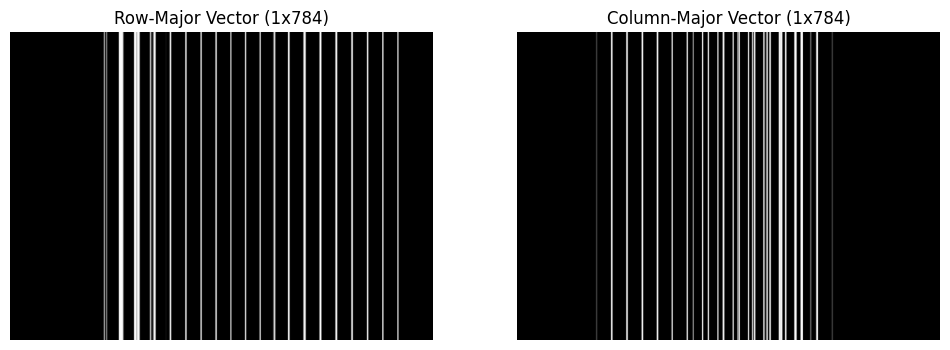

In [ ]:
# Jouw code voor opdracht 2b:

# Gebruik de al geconverteerde afbeelding_matrix van 2a
# Als je een andere afbeelding wilt, uncomment dan de volgende regel:
# afbeelding = X[idx].reshape(28, 28) # vervang idx door een gewenste index

# Row-major vector
vector_row_major = afbeelding_matrix.flatten()
print(f"Shape van row-major vector: {vector_row_major.shape}")

# Column-major vector
vector_col_major = afbeelding_matrix.flatten(order='F')
print(f"Shape van column-major vector: {vector_col_major.shape}")

# Visualiseer beide vectoren als 1x784 afbeeldingen
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(vector_row_major.reshape(1, -1), cmap='gray', aspect='auto')
plt.title('Row-Major Vector (1x784)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(vector_col_major.reshape(1, -1), cmap='gray', aspect='auto')
plt.title('Column-Major Vector (1x784)')
plt.axis('off')

plt.show()

---

## Oefening 3: Vectoroperaties


In deze oefening oefen je met de fundamentele vectoroperaties.

### Opdracht 3a

Gegeven de vectoren `u = np.array([1, 2, 3, 4])` en `v = np.array([5, 6, 7, 8])`, bereken:

1. u + v (som)
2. u - v (verschil)
3. 3 * u (scalaire vermenigvuldiging)
4. u * v (element-wise vermenigvuldiging, dit is NIET het dot product!)

Verifieer voor elk resultaat dat de berekening klopt door het met de hand na te rekenen.

In [ ]:
u = np.array([1, 2, 3, 4])
v = np.array([5, 6, 7, 8])

# Jouw code voor opdracht 3a:

berSom = u + v
print(berSom)

berVerschil = u - v
print(berVerschil)

berScalaire = 3 * u
print(berScalaire)

berElementWise = u * v
print(berElementWise)

[ 6  8 10 12]
[-4 -4 -4 -4]
[ 3  6  9 12]
[ 5 12 21 32]


### Opdracht 3b

Vectoroptelling is commutatief (u + v = v + u) en associatief ((u + v) + w = u + (v + w)). Verifieer beide eigenschappen met de vectoren:

- u = [1, 2, 3]
- v = [4, 5, 6]
- w = [7, 8, 9]

Gebruik `np.allclose()` om te controleren of twee arrays gelijk zijn (dit houdt rekening met kleine afrondingsfouten).

In [ ]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
w = np.array([7, 8, 9])

# Jouw code voor opdracht 3b:

vecCommutatief = np.allclose((u + v) + w, (v + w) + u)
print(f"Commutatief: {vecCommutatief}")

Commutatief: True


### Opdracht 3c

Scalaire vermenigvuldiging is distributief over vectoroptelling: c(u + v) = cu + cv.

Verifieer deze eigenschap met c = 2.5, u = [1, 2, 3] en v = [4, 5, 6].

In [3]:
c = 2.5
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Jouw code voor opdracht 3c:

optelling = c * (u + v) == c * u + c * v
print(f"Distributief: {optelling}")

Distributief: [ True  True  True]


---

## Oefening 4: Norm en Normalisatie


### Opdracht 4a

Bereken de L2-norm van de volgende vectoren, zowel met de hand (toon de berekening) als met `np.linalg.norm()`:

1. v1 = [3, 4]
2. v2 = [1, 1, 1, 1]
3. v3 = [5, 0, 0, 0, 0]

In [4]:
# Jouw code voor opdracht 4a:

v1 = np.array([3, 4])
v2 = np.array([1, 1, 1, 1])
v3 = np.array([5, 0, 0, 0, 0])

#Vector v1
print("Vector v1:")
# Handmatige berekening
norm_v1_hand = np.sqrt(np.sum(v1**2))
print(f"  Handmatige L2-norm: {norm_v1_hand} (sqrt(3^2 + 4^2) = sqrt(9 + 16) = sqrt(25) = 5)")
# NumPy berekening
norm_v1_np = np.linalg.norm(v1)
print(f"  np.linalg.norm: {norm_v1_np}")

#Vector v2
print("\nVector v2:")
# Handmatige berekening
norm_v2_hand = np.sqrt(np.sum(v2**2))
print(f"  Handmatige L2-norm: {norm_v2_hand} (sqrt(1^2 + 1^2 + 1^2 + 1^2) = sqrt(4) = 2)")
# NumPy berekening
norm_v2_np = np.linalg.norm(v2)
print(f"  np.linalg.norm: {norm_v2_np}")

#Vector v3
print("\nVector v3:")
# Handmatige berekening
norm_v3_hand = np.sqrt(np.sum(v3**2))
print(f"  Handmatige L2-norm: {norm_v3_hand} (sqrt(5^2 + 0^2 + 0^2 + 0^2 + 0^2) = sqrt(25) = 5)")
# NumPy berekening
norm_v3_np = np.linalg.norm(v3)
print(f"  np.linalg.norm: {norm_v3_np}")

Vector v1:
  Handmatige L2-norm: 5.0 (sqrt(3^2 + 4^2) = sqrt(9 + 16) = sqrt(25) = 5)
  np.linalg.norm: 5.0

Vector v2:
  Handmatige L2-norm: 2.0 (sqrt(1^2 + 1^2 + 1^2 + 1^2) = sqrt(4) = 2)
  np.linalg.norm: 2.0

Vector v3:
  Handmatige L2-norm: 5.0 (sqrt(5^2 + 0^2 + 0^2 + 0^2 + 0^2) = sqrt(25) = 5)
  np.linalg.norm: 5.0


### Opdracht 4b

Normaliseer de vectoren uit opdracht 4a zodat ze lengte 1 hebben. Verifieer door de norm van de genormaliseerde vectoren te berekenen.

In [5]:
# Jouw code voor opdracht 4b:

# Genormaliseer v1
norm_v1 = np.linalg.norm(v1)
v1_genormaliseerd = v1 / norm_v1
print("Genormaliseerde v1:", v1_genormaliseerd)
print("Norm van genormaliseerde v1:", np.linalg.norm(v1_genormaliseerd))

# Genormaliseer v2
norm_v2 = np.linalg.norm(v2)
v2_genormaliseerd = v2 / norm_v2
print("\nGenormaliseerde v2:", v2_genormaliseerd)
print("Norm van genormaliseerde v2:", np.linalg.norm(v2_genormaliseerd))

# Genormaliseer v3
norm_v3 = np.linalg.norm(v3)
v3_genormaliseerd = v3 / norm_v3
print("\nGenormaliseerde v3:", v3_genormaliseerd)
print("Norm van genormaliseerde v3:", np.linalg.norm(v3_genormaliseerd))

Genormaliseerde v1: [0.6 0.8]
Norm van genormaliseerde v1: 1.0

Genormaliseerde v2: [0.5 0.5 0.5 0.5]
Norm van genormaliseerde v2: 1.0

Genormaliseerde v3: [1. 0. 0. 0. 0.]
Norm van genormaliseerde v3: 1.0


### Opdracht 4c

Neem 5 willekeurige MNIST afbeeldingen en bereken de norm van elke afbeelding (als vector). Welke afbeelding heeft de grootste norm? Welke de kleinste? Visualiseer deze twee afbeeldingen en verklaar het verschil.

In [ ]:
# Jouw code voor opdracht 4c:



---

## Oefening 5: Dot Product Berekeningen


### Opdracht 5a

Bereken het dot product van de volgende vectorparen, zowel met de hand als met NumPy:

1. u = [1, 2, 3], v = [4, 5, 6]
2. u = [1, 0, 0], v = [0, 1, 0]
3. u = [2, 3], v = [-3, 2]

In [ ]:
# Jouw code voor opdracht 5a:



### Opdracht 5b

Het dot product is commutatief: u · v = v · u. Verifieer dit voor de vectoren u = [1, 2, 3, 4, 5] en v = [5, 4, 3, 2, 1].

In [ ]:
# Jouw code voor opdracht 5b:



### Opdracht 5c

Gebruik de formule cos(θ) = (u · v) / (||u|| × ||v||) om de hoek (in graden) te berekenen tussen:

1. u = [1, 0], v = [1, 1]
2. u = [1, 0], v = [0, 1]
3. u = [1, 1], v = [-1, 1]

Gebruik `np.arccos()` en `np.degrees()` voor de berekening.

In [ ]:
# Jouw code voor opdracht 5c:



### Opdracht 5d

Maak een visualisatie van de drie vectorparen uit opdracht 5c. Teken elke paar in een aparte subplot en toon de berekende hoek in de titel.

In [ ]:
# Jouw code voor opdracht 5d:



---

## Oefening 6: Neuron Simulatie


### Opdracht 6a

Implementeer een functie `neuron(inputs, weights, bias)` die de output van een enkel neuron berekent:

output = (inputs · weights) + bias

Test je functie met:
- inputs = [0.5, 0.3, 0.2]
- weights = [0.4, 0.6, -0.2]
- bias = 0.1

In [ ]:
# Jouw code voor opdracht 6a:



### Opdracht 6b

Breid je neuron functie uit met een activatiefunctie. Implementeer de ReLU activatie: ReLU(x) = max(0, x).

Maak een functie `neuron_relu(inputs, weights, bias)` die eerst de gewogen som berekent en dan ReLU toepast.

Test met dezelfde inputs als 6a, maar varieer de weights om te zien wanneer de ReLU wel/niet activeert.

In [ ]:
# Jouw code voor opdracht 6b:



### Opdracht 6c

Een MNIST pixel-vector heeft 784 elementen. Maak een "random neuron" met 784 willekeurige gewichten (tussen -0.1 en 0.1) en een bias van 0.

Pas dit neuron toe op 10 verschillende MNIST afbeeldingen en print de outputs. Wat valt je op aan de waarden?

In [ ]:
# Jouw code voor opdracht 6c:



---

## Oefening 7: Gelijkenis tussen Cijfers


### Opdracht 7a

Bereken de gemiddelde afbeelding voor elk cijfer (0-9) in de MNIST dataset.

In [ ]:
# Jouw code voor opdracht 7a:



### Opdracht 7b

Bereken de cosine similarity tussen alle paren van gemiddelde cijfers en sla dit op in een 10x10 matrix. Visualiseer deze matrix als een heatmap met `plt.imshow()`.

In [ ]:
# Jouw code voor opdracht 7b:



### Opdracht 7c

Beantwoord de volgende vragen op basis van de similarity matrix:

1. Welke twee verschillende cijfers lijken het meest op elkaar?
2. Welke twee cijfers lijken het minst op elkaar?
3. Welk cijfer lijkt het minst op alle andere cijfers (laagste gemiddelde similarity)?


In [ ]:
# Jouw code voor opdracht 7c:



---

## Bonusoefening: Tensors voor Kleurenafbeeldingen


### Bonusopdracht

Maak een programma dat een synthetische "kleurenversie" van een MNIST cijfer maakt:

1. Neem een MNIST afbeelding (28x28 grijswaarden)
2. Maak er een RGB afbeelding van (28x28x3) waar het cijfer een bepaalde kleur heeft
3. Maak een batch van 4 afbeeldingen, elk met een andere kleur
4. Visualiseer het resultaat

Dit demonstreert hoe de dimensies van tensors toenemen bij complexere data.

In [ ]:
# Jouw code voor de bonusoefening:



---

## Klaar!

Gefeliciteerd, je hebt de labo-oefeningen van les 2 afgerond. Je hebt nu een goed begrip van vectoren, matrices, en de operaties die de basis vormen van neurale netwerken.

In de volgende les leren we over matrixoperaties en hoe we een hele laag van een neuraal netwerk in één keer kunnen berekenen.